# Agenda

* Read house pricing dataset and do feature transformation
* Forward Propagation through single neuron
* Forward Propagation through multiple neurons
* Forward Propagation matrix form

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

### Part 1: Import the Housing data and do feature transformations

In [5]:
df = pd.read_csv('house_price_full.csv')
df.head()

,bedrooms,sqft_living,price
0,3,1340,313000
1,5,3650,2384000
2,3,1930,342000
3,3,2000,420000
4,4,1940,550000


In [7]:
df.shape

(499, 3)

In [8]:
x = df.copy()
# Remove target
Y = x.pop('price')

In [9]:
x.head(2)

,bedrooms,sqft_living
0,3,1340
1,5,3650


In [10]:
Y.head(2)

0     313000
1    2384000
Name: price, dtype: int64

In [11]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [12]:
# preform log transformation of target variable
Y = np.log(Y)

In [14]:
df_scaled = pd.DataFrame(x)
df_scaled

,0,1
0,-0.433198,-0.753258
1,1.675735,1.457330
2,-0.433198,-0.188649
3,-0.433198,-0.121661
4,0.621269,-0.179079
...,...,...
494,0.621269,0.873582
495,1.675735,2.299459
496,-0.433198,-0.724549
497,-0.433198,-0.179079


In [15]:
# Taking 1 sample: x1, x2
x1, x2 = df_scaled.iloc[0]

In [16]:
x1

-0.43319764280264655

In [17]:
x2

-0.7532575369937701

### Part 2: Forward Propagation with a signle Neuron

The simplest way to describe a neural network is that we have some inputs , which get combined into an auxilliary variable . The auxilliary variable is passed through the activation function  and the result is the output.

Here is another image showing each step.
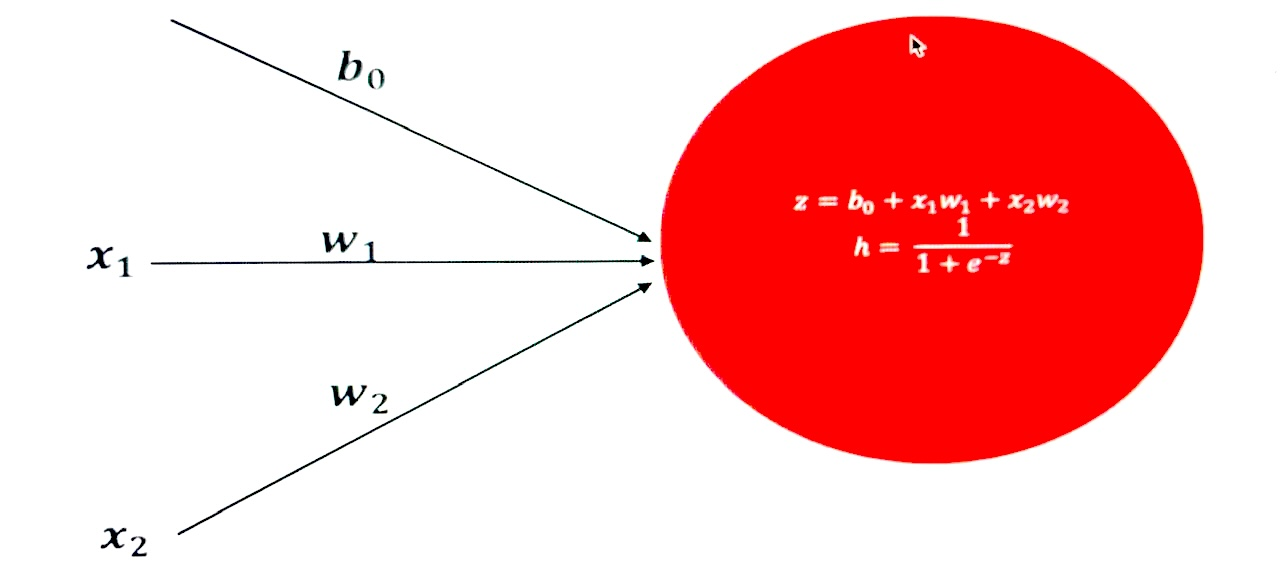
Notice that the inputs are linearly combined according to some weights  and a bias . This transformation is also sometimes called an affine transformation. The perceptron transforms the weighted inputs according to the rule of the activation function. For a single perceptron, the output  is just the output from the perceptron. The linear transformation and activation of the neuron occurs within a single layer of the network (shown in the dotted box).

Let's see what the single-layer, single neuron network give us. We have a couple of choices to make:

We must choose some weights and some biases
We must choose an activation function
For now, we will manually specify the weights and biases.

We choose a sigmoid activation function


In [19]:
# bias
b = tf.Variable([0.1], dtype=tf.float32)

# weights
w1 = tf.Variable([0.2], dtype=tf.float32)
w2 = tf.Variable([0.15], dtype=tf.float32)

In [20]:
# Cumulative input
z = b + w1*x1 + w2*x2
h = tf.math.sigmoid(z)
print("The output from the first neuron is", h)

The output from the first neuron is tf.Tensor([0.47511354], shape=(1,), dtype=float32)


### Part 3: Forward Propagation with multiple neurons

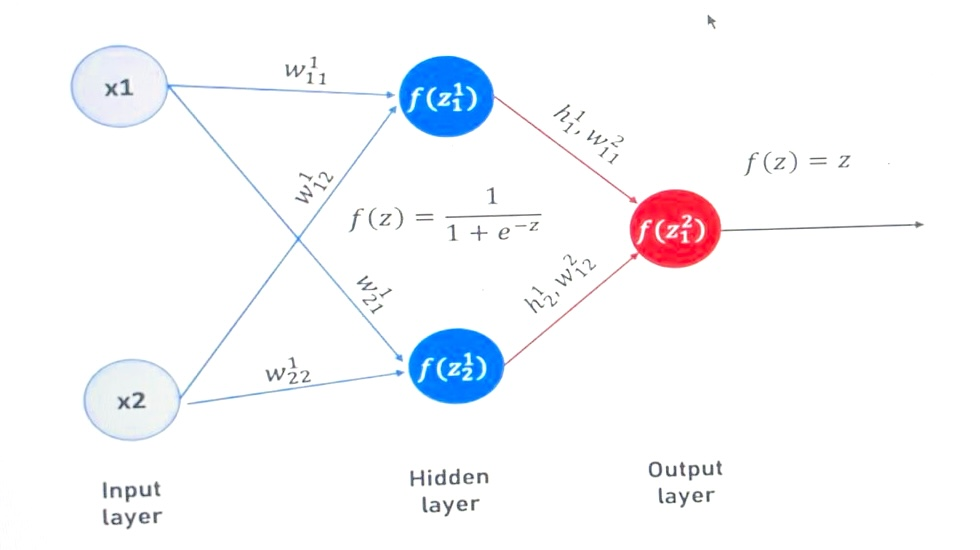

In [30]:
## layer1 weights
# neuron1
b1 = tf.Variable([0.1])
w11 = tf.Variable([0.2])
w12 = tf.Variable([0.15])

# neuron2
b2 = tf.Variable([0.25])
w21 = tf.Variable([0.5])
w22 = tf.Variable([0.6])

In [31]:
## forward pass
z1 = b1+w11*x1+w12*x2
h1 = tf.math.sigmoid(z1)
print("The output from the first neuron is", h1)

The output from the first neuron is tf.Tensor([0.47511354], shape=(1,), dtype=float32)


In [32]:
# forward pass
# neuron 2
z2 = b2 + w21*x1 + w22*x2
h2 = tf.math.sigmoid(z2)
print("The output from the second neuron is", h2)

The output from the second neuron is tf.Tensor([0.39686295], shape=(1,), dtype=float32)


In [33]:
# layer2 weights
b1 = tf.Variable([0.4])
w11 = tf.Variable([0.3])
w12 = tf.Variable([0.2])

In [34]:
## forward pass
# second layer
z1 = b1 + w11*h1 + w12*h2
h1 = z1
print("The output from the first neuron is", h1)

The output from the first neuron is tf.Tensor([0.62190664], shape=(1,), dtype=float32)


In [35]:
y_true = Y[0]
y_pred = h1.numpy()

In [36]:
# loss
L = 0.5*(y_true - y_pred)**2
print("The MSE error is", L)

The MSE error is [72.38514]


### Part 4: Forward pass matrix multiplication

This network can be described as follows:

- Input vector = $X = (x1,x2)$
- Weight Matrix (hidden layer) = $$W^1 = \begin{bmatrix}
w^1_{11}&&w^1_{12}\\
w^1_{21}&&w^1_{22}\\
\end{bmatrix}
$$
*note the subscripts are being mapped to weights in the figure

- Bias/offset Matrix (hidden layer) = $$
B^1_0 = \begin{bmatrix}
b^1_{1}\\
b^1_{2}\\
\end{bmatrix}
$$

Now the forward pass for the hidden layer can be described as 

$$W^1 \times X^T + B^1_0= Z^1 = \begin{bmatrix}
z^1_{1}\\
z^1_{2}\\
\end{bmatrix}
$$

Applying the activation function $f$ over the matrix $Z$ will complete the forward pass.

$$f(W^1 \times X^T + B^1_0)= f(Z^1) = f(\begin{bmatrix}
z^1_{1}\\
z^1_{2}\\
\end{bmatrix}) = 
\begin{bmatrix}
f(z^1_{1})\\
f(z^1_{2})\\
\end{bmatrix}
=
\begin{bmatrix}
h^1_1\\
h^1_2\\
\end{bmatrix}
= H^1
$$

For the output layer:

- The weight matrix is $$W^2 = \begin{bmatrix}
w^2_{11}&&w^2_{12}\\
\end{bmatrix}
$$

- The bias/offset matrix is $$B^2_0 = \begin{bmatrix}
b^2_{1}\\
\end{bmatrix}
$$

Now the forward pass can be written as:


$$ B_0^2+W^2 \times H^1$$


In [37]:
## layer 1 weights
W1 = tf.Variable([[0.2, 0.15], [0.5, 0.6]], dtype=tf.float32)

## layer 1 bias
B1 = tf.Variable([[0.1], [0.25]], dtype=tf.float32)

In [38]:
# layer 2 weights
W2 = tf.Variable([[0.3, 0.2]], dtype=tf.float32)

## layer 2 bias
B2 = tf.Variable([0.4], dtype=tf.float32)

In [39]:
## data
x = tf.constant([[x1, x2]], dtype=tf.float32)

In [41]:
## forward pass layer 1
Z1  = tf.matmul(W1, tf.transpose(x)) + B1
H1 = tf.math.sigmoid(Z1)
print(H1)

tf.Tensor(
[[0.47511354]
 [0.39686295]], shape=(2, 1), dtype=float32)


In [42]:
## forward pass layer 2
Z2 = tf.matmul(W2,H1)+B2

In [43]:
y_pred = Z2.numpy()
loss = 0.5*(y_true - y_pred)**2
print(loss)

[[72.38514]]


### Part 5: Random Weight Initialization

In [46]:
def random_init_params():
    w1 =tf.Variable(tf.random.uniform((2, 2)))
    b1 =tf.Variable(tf.random.uniform((2, 1)))
    w2 =tf.Variable(tf.random.uniform((1, 2)))
    v2 =tf.Variable(tf.random.uniform((1, 1)))
    return w1, b1, w2, b2

In [47]:
w1, b1, w2, b2 = random_init_params()

In [48]:
print(" the initial 1st layer weights are:\n", w1.numpy())
print("-------------------------------------------------")
print(" the initial 2nd layer weights are:\n", w2.numpy())
print("-------------------------------------------------")
print(" the initial 1st layer bias are:\n", b1.numpy())
print("-------------------------------------------------")
print(" the initial 2nd layer bias are:\n", b2.numpy())

 the initial 1st layer weights are:
 [[0.76065314 0.28860295]
 [0.81858516 0.6838262 ]]
-------------------------------------------------
 the initial 2nd layer weights are:
 [[0.20471168 0.07850122]]
-------------------------------------------------
 the initial 1st layer bias are:
 [[0.42549884]
 [0.4247129 ]]
-------------------------------------------------
 the initial 2nd layer bias are:
 [0.25]


In [49]:
def forward_prop(x, w1, b1, w2, b2):
    z1 = tf.matmul(w1,tf.transpose(x)) + b1
    h1 = tf.math.sigmoid(z1)
    z2 = tf.matmul(w2,h1) + b2
    h2 = z2
    return h2

In [50]:
x = tf.constant([[x1, x2]], dtype=tf.float32)
y = Y[0]

In [51]:
y_pred = forward_prop(x, w1, b1, w2, b2)

In [52]:
# loss
L = 0.5*(y - y_pred)**2
print("The MSE error is", L)

The MSE error is tf.Tensor([[75.3642]], shape=(1, 1), dtype=float32)


### Part 6: Backpropagation

* Autogradients: Finding derivatives using tensorflow
* Gradient Descent using tensorflow
* Backpropagation for a neural network using tensorflow
* Writing training loop

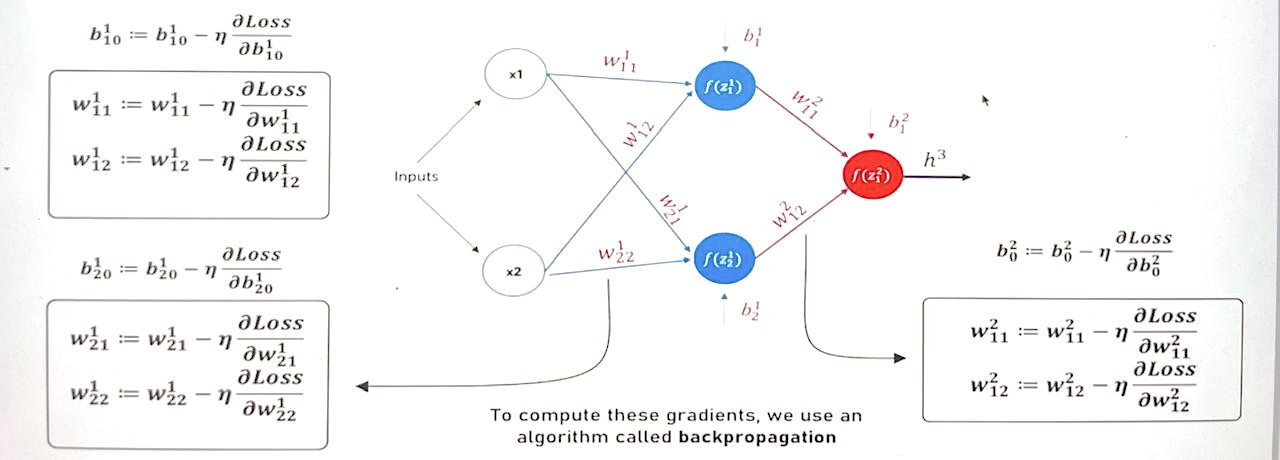

#### Part 1: Autogradients

Find the value of x that minimises $y = x^2+4x$

Gradient descent update equation

$x_{new} := x_{old}-\eta\frac{dy}{dx}$

In [53]:
x = tf.Variable(0.0)
lr = eta = 0.1

In [54]:
with tf.GradientTape() as tape:
    y = x**2+4*x
grad = tape.gradient(y,x) ## dy/dx

In [55]:
grad.numpy() # dy/dx = 2x+4, x=0 => dy/dx = 4

4.0

In [56]:
x.assign_sub(lr*grad) ## x_new = x_old - lr*dy/dx

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-0.4>

In [57]:
x.numpy()

-0.4

#### Part 2: Gradient Descent

In [59]:
x = tf.Variable(0.0)
lr = 0.1
for i in range(10):
    with tf.GradientTape() as tape:
        y = x**2 + 4*x
    grad = tape.gradient(y,x)
    x.assign_sub(lr*grad)
    print(x.numpy())

-0.4
-0.72
-0.9760001
-1.1808001
-1.34464
-1.4757121
-1.5805696
-1.6644557
-1.7315645
-1.7852516


#### Part 3: Backpropagation for neural networks